In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Cop defection model formulation

### Model assumptions

* All the cops have the same rank, i.e. all cops are field cops
* The defected cops don't reveal to the other cops that they have defected (only rebels know which cops have defected and support the rebellion cause)
* Then, how will they affect the dynamics of the rebellion i.e. what exactly will a defected cop do? The defected cops, simply will not jail any active rebels in its vision

### States of a cop

* There will be only 2 states for a cop, and they are either **defected** or **not_defected**
* The transition of a cop's state depends on the various attributes that guide the rules

### Attributes that guide the rules for a cop

* The model considers only some parameters to decide cop defection rules based on greed and hardship faced

1. Benefits provided by authority ($\lambda$) - _homogeneous_
2. Personal bias (agenda) against the authority (B) - _heterogeneous_ $$ B = U(0, 1)$$
a higher value indicates higher bias against the authority - **yet to be considered**
3. Hardship (H) - _heterogeneous_ $$H = U(0, 1)$$
4. Greed (Gr) - _heterogeneous_ $$Gr = U(0, 1)$$
5. Perceived legitimacy (L) - _heterogeneous_ - different from that of the rebels since the cops and rebels represent different sets of population in the society

# Derived attributes

1. Tendency to defect due to grievance $$ T_{grievance} = H * (1 - L) $$
2. Tendency to defect due to greed $$ T_{greed} = (1 - \lambda) * Gr $$
3. Avg tendency to defect $$ T_{avg} = \frac{T_{grievance} + T_{greed}}{2}$$
    Fine till here

4. Probability defection $$ P_{def} = 1 - e^{-(\frac{B}{T_{avg}})} $$
    **Needs some changes**

In [2]:
L = 0.5
# [0, 1]

In [3]:
lambda_b = 0.9
# [0, 1]

In [28]:
n =8

In [17]:
H = np.array([0.2, 0.2, 0.2, 0.8, 0.8, 0.8, 0.8, 0.8])
Gr = np.array([0.2, 0.2, 0.8, 0.2, 0.2, 0.8, 0.2, 0.8])

In [18]:
B = np.random.rand(n)
B = np.array([0.2, 0.8, 0.2, 0.2, 0.8, 0.2, 0.8, 0.8])
#Gr = np.random.rand(n)
#H = np.random.rand(n)

In [19]:
H

array([0.2, 0.2, 0.2, 0.8, 0.8, 0.8, 0.8, 0.8])

In [20]:
Gr

array([0.2, 0.2, 0.8, 0.2, 0.2, 0.8, 0.2, 0.8])

In [21]:
B

array([0.2, 0.8, 0.2, 0.2, 0.8, 0.2, 0.8, 0.8])

In [30]:
x_labels = np.arange(n)

In [31]:
T_grievance = H * (1 - L)

In [32]:
T_greed = (1 - lambda_b) * Gr

In [33]:
T = (T_grievance + T_greed) / 2

In [34]:
P_def = 1 - np.exp(-(B / T))

c:\users\abhishek\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


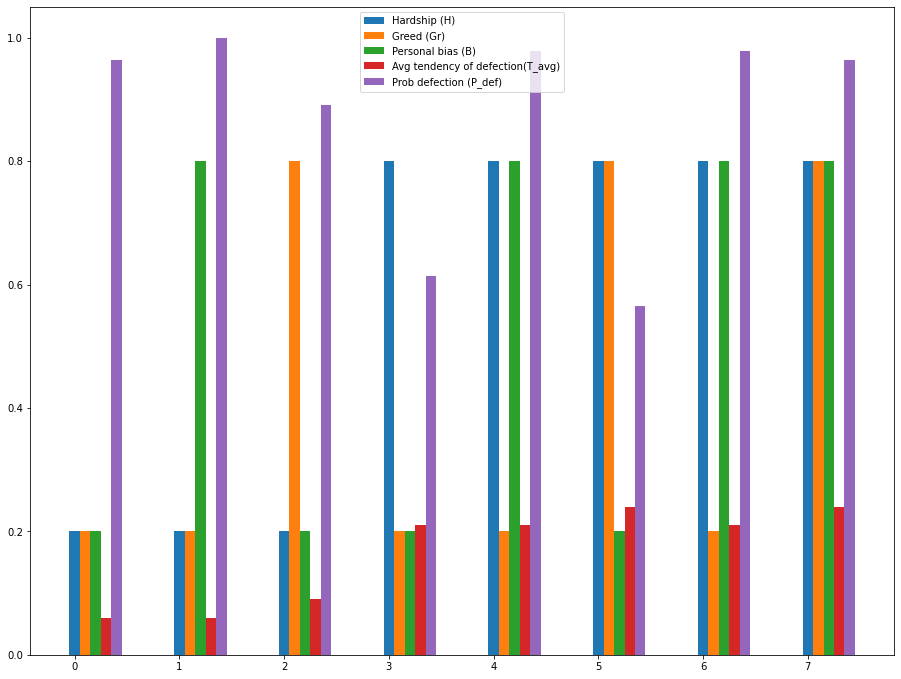

In [35]:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_axes([0,0,1,1])
ax.bar(x_labels+0.00, H, width=0.10, label="Hardship (H)")
ax.bar(x_labels+0.10, Gr, width=0.10, label="Greed (Gr)")
ax.bar(x_labels+0.20, B, width=0.10, label="Personal bias (B)")
ax.bar(x_labels+0.30, T, width=0.10, label="Avg tendency of defection(T_avg)")
ax.bar(x_labels+0.40, P_def, width=0.1, label="Prob defection (P_def)")
ax.legend()
fig.show()